In [57]:
import numpy as np
from scipy.integrate import odeint
from scipy import optimize
from scipy.optimize import curve_fit
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
from matplotlib.ticker import MultipleLocator, MaxNLocator,FuncFormatter, ScalarFormatter
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from __future__ import division
from scipy.optimize import check_grad
from scipy.optimize import differential_evolution
import warnings
import tensorflow as tf
import datetime, os
import hyperopt
from hyperopt import fmin, tpe, hp
from decimal import *
import time
import numpy as np
from scipy.ndimage.interpolation import shift
import matplotlib.pylab as plt

In [58]:
#Ajuste com as duas populações usando média móvel de X dias para frente
# A=Jua 
# B=Petr
confJua=np.array([8857.00,  8881.50,  8910.70,  8949.10,  8993.50,  9031.50,  9067.30,  9098.30, 
                9127.30,  9158.30,  9194.10,  9232.30,  9267.90,  9296.30,  9319.30,  9348.30, 
                9382.30,  9439.10,  9510.30,  9584.10,  9644.50,  9702.50,  9759.50,  9823.30, 
                9893.70,  9976.30, 10056.10, 10114.30, 10173.70, 10242.30, 10313.90, 10396.70,
                10500.10, 10588.10, 10654.50, 10721.70, 10796.30, 10860.70, 10943.90, 11035.90,
                11122.30, 11185.10, 11235.10, 11289.30, 11355.30, 11434.70, 11522.30, 11611.90,
                11680.10, 11736.10, 11764.50, 11838.10, 11929.30, 12028.70, 12125.10, 12226.30,
                12283.30, 12344.30, 12409.50, 12491.90, 12587.70, 12680.50, 12755.50, 12815.70,
                12867.10, 12908.10, 12956.70, 12999.50, 13067.30, 13123.30, 13177.10, 13236.30,
                13314.50, 13375.10, 13435.50, 13492.30, 13529.90, 13559.10, 13594.10, 13635.10,
                13688.10, 13750.90, 13811.70, 13855.90, 13891.90, 13927.70, 13968.50, 14008.30,
                14054.55, 14111.55])


confPetr=np.array([15681.00, 15722.75, 15771.35, 15830.55, 15909.15, 15968.55, 16013.75, 16060.75,
                16116.95, 16179.95, 16258.35, 16355.55, 16438.55, 16501.95, 16563.75, 16633.55,
                16707.15, 16791.55, 16895.15, 16978.55, 17047.95, 17115.35, 17187.75, 17281.75,
                17390.55, 17522.55, 17633.95, 17727.55, 17802.35, 17877.35, 17950.75, 18045.95,
                18179.15, 18290.15, 18385.35, 18477.15, 18576.55, 18701.55, 18857.95, 19073.15,
                19260.95, 19419.55, 19545.35, 19664.15, 19772.55, 19920.15, 20067.55, 20183.35,
                20274.95, 20350.55, 20437.75, 20582.55, 20757.95, 20992.55, 21191.55, 21339.55,
                21462.15, 21580.15, 21698.15, 21840.55, 22030.55, 22188.55, 22320.55, 22431.55,
                22555.95, 22632.75, 22767.15, 22945.35, 23086.55, 23189.95, 23338.15, 23469.95,
                23603.55, 23762.55, 23960.75, 24114.35, 24226.95, 24326.55, 24424.95, 24516.35,
                24635.95, 24791.75, 24915.75, 25015.35, 25111.15, 25213.75, 25316.15, 25440.15,
                25593.65, 25750.32])



mortesJua=np.array([160.00, 160.25, 160.65, 161.25, 161.85, 162.45, 162.85, 163.25, 163.45, 163.65,
                  164.05, 164.45, 164.65, 165.05, 165.45, 165.85, 166.25, 167.05, 168.05, 169.05,
                  170.05, 171.25, 172.05, 172.65, 173.65, 174.65, 175.45, 176.25, 177.05, 177.65,
                  178.25, 179.25, 180.65, 182.05, 183.85, 185.85, 187.85, 189.45, 191.45, 193.65,
                  195.85, 197.65, 199.65, 201.25, 202.05, 202.85, 203.65, 204.25, 204.65, 205.45,
                  206.45, 207.65, 209.05, 210.65, 212.05, 213.05, 214.05, 214.85, 215.85, 216.65,
                  217.45, 218.25, 219.25, 220.45, 222.05, 223.45, 224.65, 226.05, 226.85, 227.25,
                  228.05, 228.85, 229.85, 231.05, 232.85, 234.85, 237.45, 239.85, 242.05, 244.05,
                  245.65, 246.85, 247.85, 249.05, 249.85, 251.05, 252.05, 252.85, 253.60, 254.60])

mortesPetr=np.array([190.00, 191.25, 192.45, 193.85, 195.05, 195.85, 196.25, 196.45, 196.65, 197.05,
                  197.85, 198.65, 199.45, 200.05, 200.85, 201.65, 202.45, 203.45, 205.05, 206.65,
                  207.85, 210.05, 212.45, 214.45, 217.25, 220.45, 223.05, 225.65, 228.25, 230.45,
                  232.45, 234.05, 235.45, 236.65, 237.45, 239.45, 241.45, 244.85, 249.45, 253.65,
                  256.45, 260.45, 264.45, 267.45, 271.05, 274.65, 277.25, 278.65, 280.45, 282.05,
                  284.25, 286.65, 289.85, 293.05, 296.25, 299.05, 302.25, 304.45, 306.25, 308.25,
                  310.65, 312.85, 315.45, 319.05, 323.25, 327.05, 330.45, 333.65, 335.65, 336.65,
                  338.65, 340.85, 343.25, 346.25, 349.25, 351.25, 353.05, 355.25, 357.05, 359.05,
                  362.05, 366.45, 370.25, 374.05, 378.85, 383.65, 387.65, 391.65, 396.40, 400.40])

NumDays=len(confPetr)

N=580000
NJua=226200
NPetr=353800

#b11=1.72414e-09  #Meus 22 Março
#b12=7.62700e-07
#b21=1.74574e-06
#b22=1.72414e-09
#a1=0.25000
#a2=0.25000
#gamma1=0.25000
#gamma2=0.25000
#mu1 =0.00495
#mu2 =0.00162




#b22=2.369026e-09  #Alison
#b21=1.376457e-06 
#b12=6.235606e-07 
#b11=9.907157e-09 
#a=0.2204123 
#mu2=0.001319142 
#mu1=0.003864555 
#gamma=0.1996095



#b11=1.72414e-09 #Meus 23 Mar
#b12=7.87835e-07
#b21=1.76040e-06
#b22=1.72414e-09
#a1=0.22041
#a2=0.22041
#gamma1=0.25000
#gamma2=0.25000
#mu1 =0.00499
#mu2 =0.00168



b22=4.878075e-10 
b21=1.480169e-06 
b12=5.770062e-07 
b11=7.584886e-09 
a=0.2222142 
mu2=0.00122903 
mu1=0.004181214 
gamma2=0.1984055
gamma1=0.1984055

a1=a
a2=a

V1=(b21-b11)/mu1
V2=(b22-b12)/mu2




S20=217233.5 
S10=337975 
E20=109
E10=144
I20=197 
I10=300 
R20=8500 
R10=15191 
D20=160 
D10=190

N1=S10+E10+I10+R10+D10
N2=S20+E20+I20+R20+D20



In [59]:
V1=(b21-b11)/mu1
V2=(b22-b12)/mu2
print(f'V1={V1}\nV2={V2}')


V1=0.000352190563314865
V2=-0.0004690840683303092


# Método de integração

In [60]:
t = np.linspace(0, NumDays-1, NumDays)  #tempo por dias
dt = 1/10
t1 = np.linspace(0, NumDays-1, int((NumDays-1)/dt)+1)

In [61]:
def SEIRD2(y,t,a11,a12,a21,a22,b1,b2,gamma1,gamma2,mu1,mu2):  

    S1=y[0]
    E1=y[2]
    I1=y[4]
    R1=y[6]
    D1=y[8]
    S2=y[1]
    E2=y[3]
    I2=y[5]
    R2=y[7]
    D2=y[9]
    
    V1=(a11)*I1+(a12)*I2
    V2=(a21)*I1+(a22)*I2

    dS1dt=-V1*S1
    dE1dt=V1*S1 - b1*E1
    dI1dt=b1*E1-(gamma1+mu1)*I1
    dR1dt=gamma1*I1
    dD1dt=mu1*I1
    
    dS2dt=-V2*S2
    dE2dt=V2*S2 - b2*E2
    dI2dt=b2*E2-(gamma2+mu2)*I2
    dR2dt=gamma2*I2
    dD2dt=mu2*I2
       
    
    return [dS1dt,dS2dt,dE1dt,dE2dt,dI1dt,dI2dt,dR1dt,dR2dt,dD1dt,dD2dt]

In [62]:
def Jac_SEIRD2(y,t,a11,a12,a21,a22,b1,b2,gamma1,gamma2,mu1,mu2):  
    
    S1=y[0]
    E1=y[2]
    I1=y[4]
    R1=y[6]
    D1=y[8]
    
    S2=y[1]
    E2=y[3]
    I2=y[5]
    R2=y[7]
    D2=y[9]
    
    V1=(a11)*I1+(a12)*I2
    V2=(a21)*I1+(a22)*I2

    J=[[-V1,0,0,0,-(a11)*S1,-(a12)*S1,0,0,0,0],[0,-V2,0,0,-(a21)*S2,-(a22)*S2,0,0,0,0], 
       [V1,0,-b1,0,(a11)*S1,(a12)*S1,0,0,0,0], [0,V2,0,-b2,-(a21)*S2,-(a22)*S2,0,0,0,0],
       [0,0,b1,0,-(gamma1+mu1),0,0,0,0,0], [0,0,0,b2,0,-(gamma2+mu2),0,0,0,0],
       [0,0,0,0,gamma1,0,0,0,0,0], [0,0,0,0,0,gamma2,0,0,0,0],
       [0,0,0,0,mu1,0,0,0,0,0],[0,0,0,0,0,mu2,0,0,0,0]]
    
    return J

# Aplicação Petrolina-Juazeiro

In [63]:
DiasdoAno = np.array([])
meses=np.array(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
meseslim=np.array([31,28,31,30,31,30,31,31,30,31,30,31])
for m in range(len(meses)):
    for d in range(meseslim[m]):
        DiasdoAno=np.concatenate((DiasdoAno,np.array([f"{d+1} {meses[m]}"])))
d0="13 Feb"
df="5 Apr"
index0=np.where(DiasdoAno==d0)[0][0]
TempoDias=DiasdoAno[index0: index0+NumDays]

# Gráficos das soluções baseadas em dados de 1 população

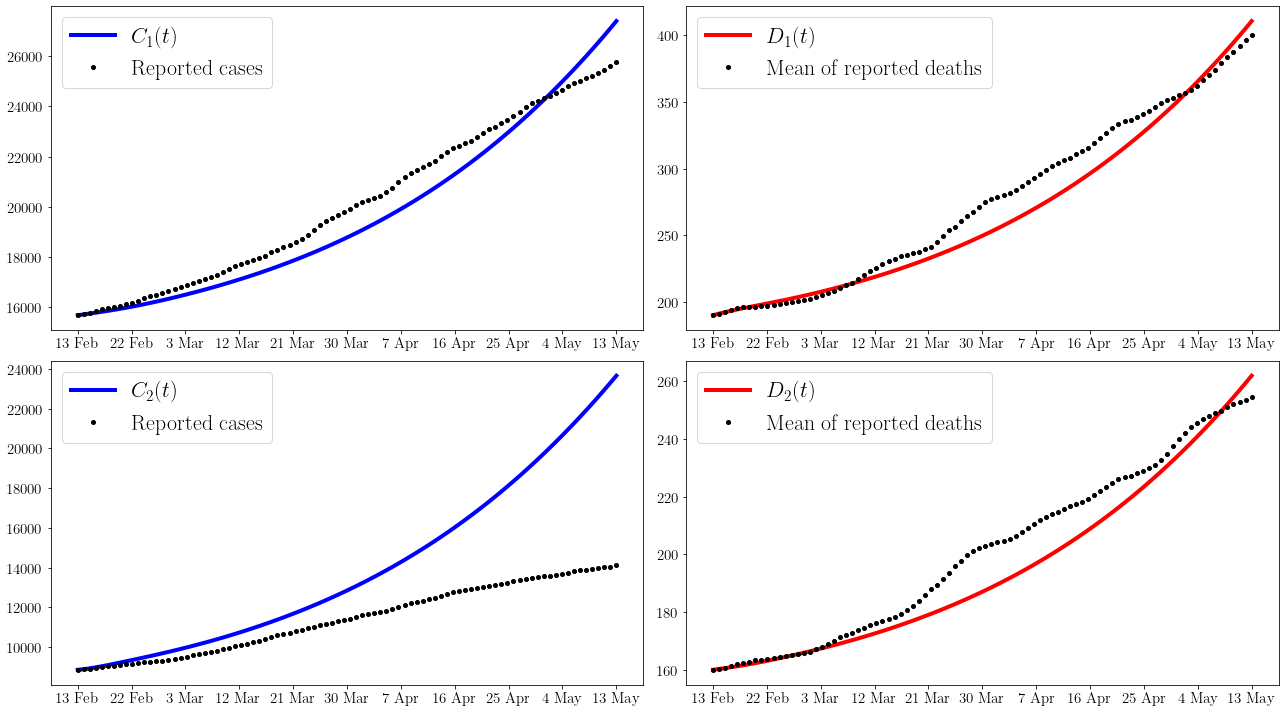

In [89]:
#a=0.2222075
#a1=a
#a2=a
#mu1=0.003864555 
mu2=0.00152903 


t = np.linspace(0, NumDays-1, NumDays)  #tempo por dias
y0=[S10,S20,E10,E20,I10,I20,R10,R20,D10,D20]
sol=odeint(SEIRD2,y0,t1,args=(b11,b12,b21,b22,a1,a2,gamma1,gamma2,mu1,mu2))
y=sol[(t/dt).astype(int)]
CPetr= y[:,4]+y[:,6]+y[:,8]
CJua=y[:,5]+y[:,7]+y[:,9]
DPetr=y[:,8]
DJua=y[:,9]

legsize=22
colorcases='blue'
colordeaths='red'
colordata='black'
linewidth=4
markersize=4
fontaxis=15
P=8.9

tamfonte=25
fig=plt.figure(figsize=(18,10))
t=TempoDias
ax1 = fig.add_subplot(2,2,1)
ax1.plot(t, CPetr, color=colorcases,label = "$C_1(t)$",lw=linewidth)
ax1.plot(t, confPetr, 'o',color=colordata,label = "Reported cases",ms=markersize)
ax1.legend(fontsize=legsize)
ax1.xaxis.set_major_locator(plt.MultipleLocator(P))
plt.xticks(fontsize=fontaxis)
plt.yticks(fontsize=fontaxis)
#ax1.set_title("(a) Infectious Cases in the neighbouring Counties",fontsize=tamfonte)


ax2 = fig.add_subplot(2,2,2)
ax2.plot(t, DPetr, color=colordeaths,label = "$D_1(t)$",lw=linewidth)
ax2.plot(t, mortesPetr, 'o',color=colordata,label = "Mean of reported deaths",ms=markersize)
ax2.legend(fontsize=legsize)
ax2.xaxis.set_major_locator(plt.MultipleLocator(P))
plt.xticks(fontsize=fontaxis)
plt.yticks(fontsize=fontaxis)
#ax2.set_title("(b) Deaths in the neighbouring Counties",fontsize=tamfonte)

ax3 = fig.add_subplot(2,2,3)
ax3.plot(t, CJua, color=colorcases,label = "$C_2(t)$",lw=linewidth)
ax3.plot(t, confJua, 'o',color=colordata,label = "Reported cases",ms=markersize)
ax3.legend(fontsize=legsize)
ax3.xaxis.set_major_locator(plt.MultipleLocator(P))
plt.xticks(fontsize=fontaxis)
plt.yticks(fontsize=fontaxis)
#ax3.set_title("(c) Infectious cases in NY County",fontsize=tamfonte)

ax4 = fig.add_subplot(2,2,4)
ax4.plot(t, DJua, color=colordeaths,label = "$D_2(t)$",lw=linewidth)
ax4.plot(t, mortesJua, 'o',color=colordata,label = "Mean of reported deaths",ms=markersize)
ax4.legend(fontsize=legsize)
ax4.xaxis.set_major_locator(plt.MultipleLocator(P))
plt.xticks(fontsize=fontaxis)
plt.yticks(fontsize=fontaxis)
#ax4.set_xlim([0,xmax])
#ax4.set_ylim([0,550])
#ax4.set_title(f"(d) Deaths in NY County",fontsize=tamfonte)



#fig.subplots_adjust(bottom=0.05, right=1, top=0.97, left=0.05)
fig.tight_layout()
plt.show()
fig.savefig('AjustePetrolina.png',dpi=400)


t = np.linspace(0, NumDays-1, NumDays)

In [90]:
#Soluções Calculadas
# NY
S1=y[:,0]
E1=y[:,2]
I1=y[:,4]
R1=y[:,6]
D1=y[:,8]

C1=I1+R1+D1

#Vizinhos
S2=y[:,1]
E2=y[:,3]
I2=y[:,5]
R2=y[:,7]
D2=y[:,9]

C2=I2+R2+D2


In [91]:
Dt1=mortesPetr #petrolina
Dt2=mortesJua

Ct1=confPetr #petrolina
Ct2=confJua

Et2=(Ct2-shift(Ct2, +1, cval=0))/(a)
Et2[0]=E20
St2=N2-Et2-Ct2



Et1=(Ct1-shift(Ct1, +1, cval=0))/(a)
Et1[0]=E10
St1=N1-Et1-Ct1




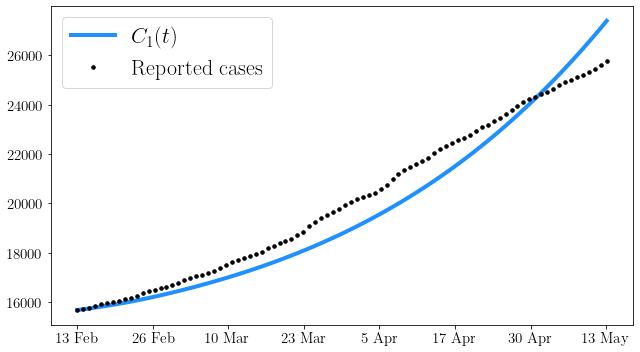

In [92]:
t=TempoDias
colorcases='dodgerblue'
markersize=3.5
P=12.7
fig=plt.figure(figsize=(9,5))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(t,C1, color=colorcases,label = "$C_1(t)$",lw=linewidth)
ax1.plot(t, Ct1, 'o',color=colordata,label = "Reported cases ",ms=markersize)
ax1.legend(fontsize=legsize)
ax1.xaxis.set_major_locator(plt.MultipleLocator(P))
plt.xticks(fontsize=fontaxis)
plt.yticks(fontsize=fontaxis)
fig.tight_layout()
plt.show()
fig.savefig('CasosPetr.png',dpi=500)




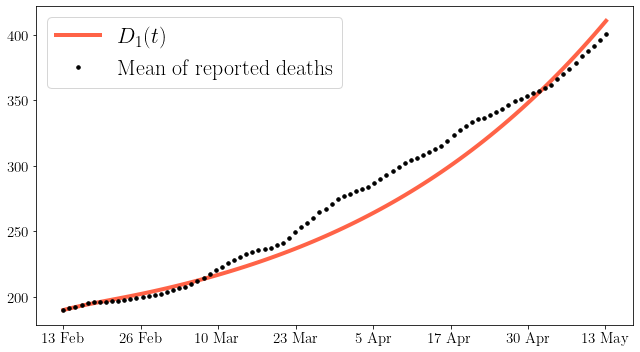

In [93]:
colordeaths='tomato'
fig=plt.figure(figsize=(9,5))
ax2 = fig.add_subplot(1,1,1)
ax2.plot(t, D1, color=colordeaths,label = "$D_1(t)$",lw=linewidth)
ax2.plot(t, Dt1, 'o',color=colordata,label = "Mean of reported deaths",ms=markersize)
ax2.legend(fontsize=legsize)
ax2.xaxis.set_major_locator(plt.MultipleLocator(P))
plt.xticks(fontsize=fontaxis)
plt.yticks(fontsize=fontaxis)
fig.tight_layout()
plt.show()
fig.savefig('MortesPetr.png',dpi=500)



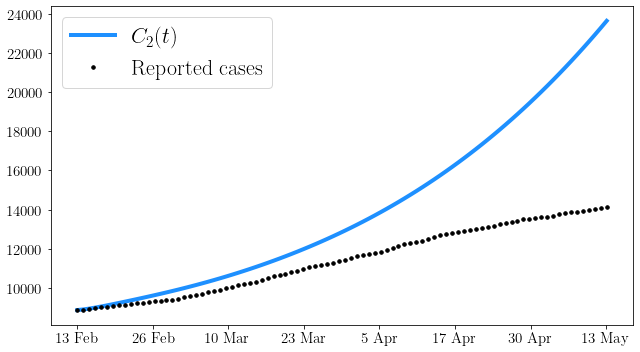

In [94]:
t=TempoDias
colorcases='dodgerblue'
markersize=3.5
fig=plt.figure(figsize=(9,5))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(t,C2, color=colorcases,label = "$C_2(t)$",lw=linewidth)
ax1.plot(t, Ct2, 'o',color=colordata,label = "Reported cases ",ms=markersize)
ax1.legend(fontsize=legsize)
ax1.xaxis.set_major_locator(plt.MultipleLocator(P))
plt.xticks(fontsize=fontaxis)
plt.yticks(fontsize=fontaxis)
fig.tight_layout()
plt.show()
fig.savefig('CasosJua.png',dpi=500)




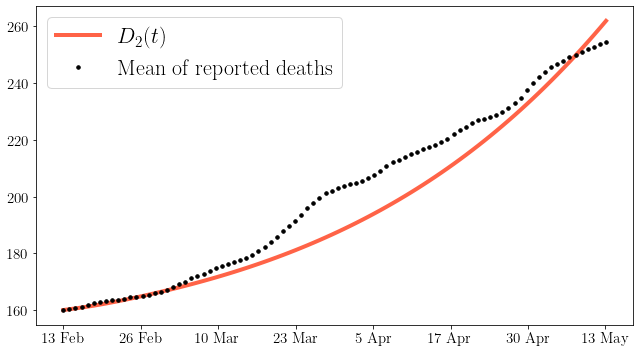

In [95]:
colordeaths='tomato'
fig=plt.figure(figsize=(9,5))
ax2 = fig.add_subplot(1,1,1)
ax2.plot(t, D2, color=colordeaths,label = "$D_2(t)$",lw=linewidth)
ax2.plot(t, Dt2, 'o',color=colordata,label = "Mean of reported deaths",ms=markersize)
ax2.legend(fontsize=legsize)
ax2.xaxis.set_major_locator(plt.MultipleLocator(P))
plt.xticks(fontsize=fontaxis)
plt.yticks(fontsize=fontaxis)
fig.tight_layout()
plt.show()
fig.savefig('MortesJua.png',dpi=500)



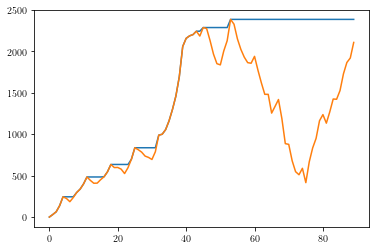

In [100]:
t = np.linspace(0, NumDays-1, NumDays)
ErroS=np.abs(S1-St1)
#ErroD=np.maximum(np.abs(D1-Dt1),np.abs(D2-Dt2))
KS_t=S2*(1-(1-ErroS/S1)*np.exp(-(abs(V1)*np.abs(D1-Dt1)+abs(V2)*np.abs(D2-Dt2))))
KS_t2=S2*(1-(1-ErroS/S1)*np.exp(-((V1)*(D1-Dt1)+(V2)*(D2-Dt2))))
#KS_t=St2NY*(1-(S1/St1Viz)*np.exp(-(abs(V1)*np.abs(D1-Dt1)+abs(V2)*np.abs(D2-Dt2))))

KS_t=(KS_t+KS_t2)/2

KS=0*t
for d in t.astype(int):
    KS[d] = max(np.abs(KS_t[:d+1]))
plt.plot(t,KS,KS_t)
plt.show()

<Figure size 864x504 with 0 Axes>

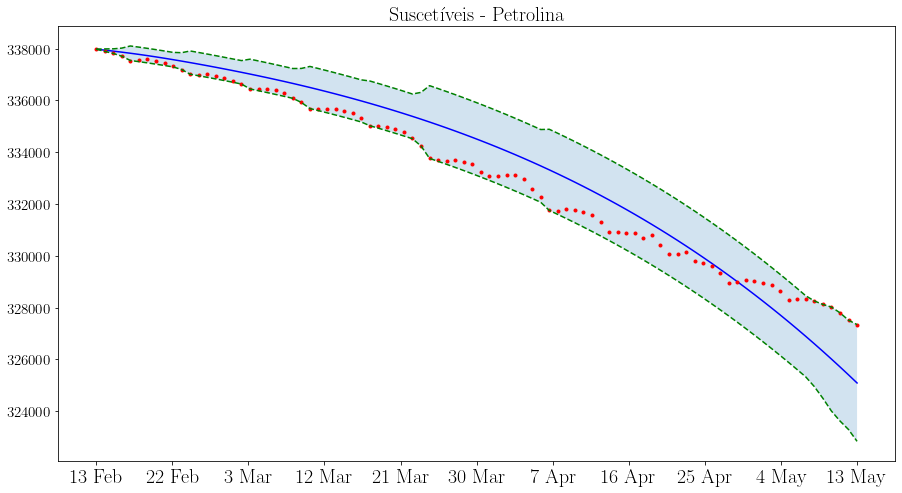

In [101]:
plt.figure(figsize=(12,7))
ErroScumulative=0*ErroS
for d in t.astype(int):
    ErroScumulative[d] = max(ErroS[:d+1])
    
fig=plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
ax.plot(TempoDias,S1,color='b')
ax.plot(TempoDias,St1,'.',color='r')
ax.plot(TempoDias,S1+ErroScumulative,S1-ErroScumulative,linestyle='dashed',color='g')
ax.fill_between(TempoDias,S1+ErroScumulative,S1-ErroScumulative,alpha=0.2)
ax.xaxis.set_major_locator(plt.MultipleLocator(P))
ax.set_title('Suscetíveis - Petrolina',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.show()


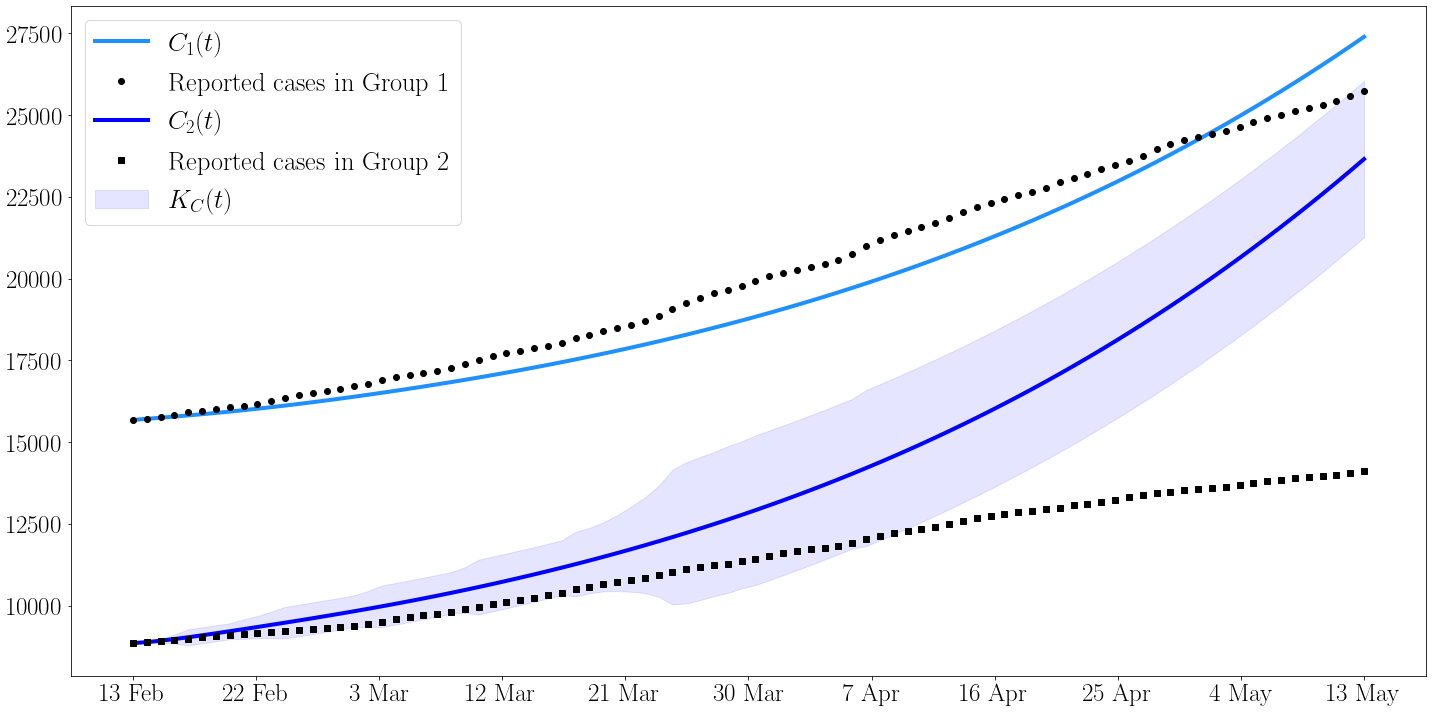

In [102]:
#Erro baseado em S e E
t = np.linspace(0, NumDays-1, NumDays)  #eixo horizontal em dias contados

e_alpha=max(abs(1/4-a),abs(a-1/5))
logM=max(abs(np.log(1-e_alpha/a)),abs(np.log(1+e_alpha/a)))
ErroC2=0*t
ErroC2=KS #+E20*t*np.exp(-a*t)*e_alpha#+(S2[0]-S2)*logM

ErroC1=0*t
for d in t.astype(int):
    ErroC1[d]=max(np.abs(C1[:d+1]-Ct1[:d+1]))


linecolorPetr='dodgerblue'
linecolorJua='blue'
markercolor='black'
alfacolor='blue' 
markersize=6
linewidth=4
tamfonte=25

P=8.9

Tempo=TempoDias #Eixo horizontal em dias do mês

fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

g1,=plt.plot(Tempo,C1,color=linecolorPetr,label='$C_{1}(t)$',lw=linewidth)
g2,=plt.plot(Tempo,Ct1,'o',color=markercolor,label='Reported cases in Group 1',ms=markersize)
g4,=plt.plot(Tempo,C2,color=linecolorJua,label='$C_{2}(t)$',lw=linewidth)
g5,=plt.plot(Tempo,Ct2,'s',color=markercolor,label='Reported cases in Group 2',ms=markersize)
g6=plt.fill_between(Tempo,C2+ErroC2,np.maximum(C2-ErroC2,0),alpha=0.1,label='$K_{C}(t)$',color=alfacolor)

ax.xaxis.set_major_locator(plt.MultipleLocator(P))
ax.legend(handles=[g1,g2,g4,g5,g6],fontsize=1.2*legsize)

plt.xticks(fontsize=tamfonte)
plt.yticks(fontsize=tamfonte)
fig.tight_layout()
plt.show()
fig.savefig('ErroEstimativaPetrJua.png',dpi=600)



In [108]:
print(f'Erro C2 = {100*ErroC2[-1]/C2[-1]:.2f}%')
print(f'Erro C1 = {100*ErroC1[-1]/C1[-1]:.2f}%')

Erro C2 = 10.09%
Erro C1 = 5.99%


In [109]:
C2[-1]

23655.00944322853

In [110]:
ErroC2[-1]

2386.1369572074345

In [107]:
Ct2[-1]

14111.55